In [1]:
!mkdir ~/.kaggle

In [2]:
!mv kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#!/bin/bash
!kaggle datasets download grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 93% 981M/1.03G [00:07<00:01, 38.3MB/s]
100% 1.03G/1.03G [00:07<00:00, 143MB/s]


In [6]:
!unzip /content/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [7]:
from tensorflow import keras
import tensorflow as tf
from keras import Sequential, layers
import cv2
import PIL


In [8]:
model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224,224,3),
    alpha=1.0,
    include_top=False,
    weights='imagenet',
    classes=1000,
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True
)

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


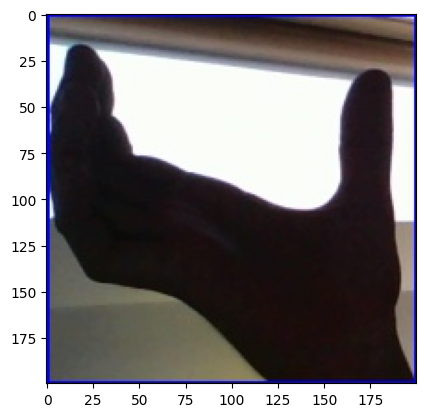

In [19]:
dir = '/content/asl_alphabet_train/asl_alphabet_train'
import matplotlib.pyplot as plt
import os
plt.imshow(plt.imread(os.path.join(dir,'space',os.listdir(os.path.join(dir,"space"))[5])))

In [20]:
len(os.listdir(dir))

29

In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dir,
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    verbose=True
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dir,
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
    verbose=True
)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 8700 files for validation.


In [44]:
keras.backend.clear_session()

In [45]:
model.trainable = False


In [46]:
tuned_model=Sequential([
    model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(29,activation='softmax')
])

In [47]:
tuned_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 29)             │        16,733 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 955,853 (3.65 MB)

 Trainable params: 16,733 (65.36 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [48]:
tuned_model.compile(optimizer='Adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [49]:
history = tuned_model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 89s 37ms/step - accuracy: 0.7772 - loss: 1.1272 - val_accuracy: 0.9785 - val_loss: 0.1786
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 130s 33ms/step - accuracy: 0.9824 - loss: 0.1459 - val_accuracy: 0.9911 - val_loss: 0.0837
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.9914 - loss: 0.0721 - val_accuracy: 0.9952 - val_loss: 0.0507
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9954 - loss: 0.0436 - val_accuracy: 0.9961 - val_loss: 0.0345
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.9975 - loss: 0.0293 - val_accuracy: 0.9970 - val_loss: 0.0256
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9982 - loss: 0.0212 - val_accuracy: 0.9976 - val_loss: 0.0198
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9989 - loss: 0.0160 - val_accuracy: 0.9975 - val_loss: 0.0162
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 75s 35ms/step - accuracy: 0.9991 

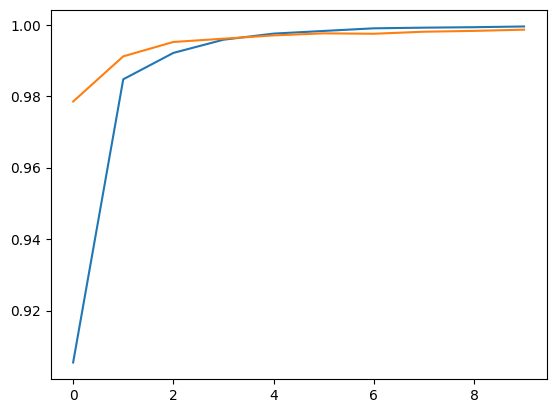

In [50]:
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.show()

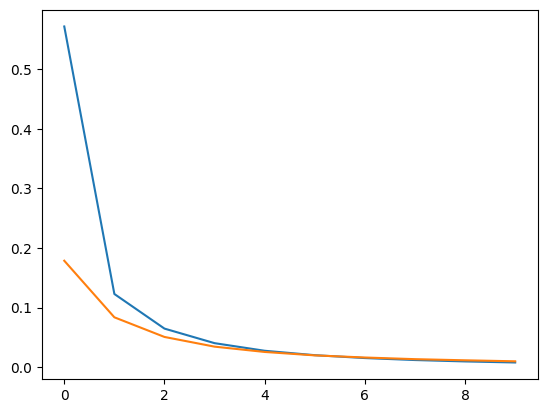

In [51]:
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'],label='Validation')
plt.show()

In [53]:
import numpy as np


In [69]:
test_path = '/content/asl_alphabet_test/asl_alphabet_test/D_test.jpg'
x_test = cv2.imread(test_path)
x_test = cv2.resize(x_test,(224,224))
x_test= np.expand_dims(x_test,axis=0)
y_pred = tuned_model.predict(x_test)
correct_index=0
max=10e-1000
for i,m in enumerate(y_pred[0]):
  if max<m:
    max=m
    correct_index=i
print(correct_index,max)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3 1.0


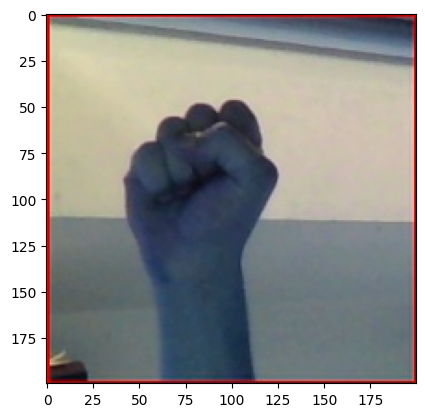

In [77]:
test_path = '/content/asl_alphabet_test/asl_alphabet_test/S_test.jpg'
x_test = cv2.imread(test_path)
plt.imshow(x_test)

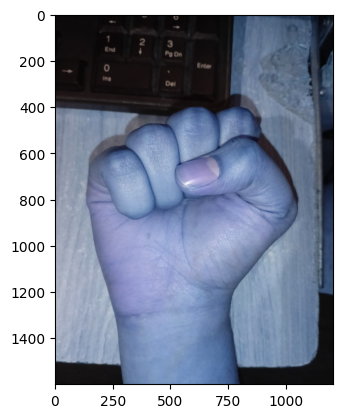

In [72]:
test_path = '/content/A.jpg'
x_test = cv2.imread(test_path)
plt.imshow(x_test)

In [74]:
test_path = '/content/1000097285.jpg'
x_test = cv2.imread(test_path)
x_test = cv2.resize(x_test,(224,224))
x_test= np.expand_dims(x_test,axis=0)
y_pred = tuned_model.predict(x_test)
correct_index=0
max=10e-1000
for i,m in enumerate(y_pred[0]):
  if max<m:
    max=m
    correct_index=i
print(correct_index,max)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
19 0.754937


In [59]:
x_test = cv2.resize(x_test,(224,224))


In [61]:
x_test= np.expand_dims(x_test,axis=0)


In [62]:
x_test.shape


(1, 224, 224, 3)

In [63]:
y_pred = tuned_model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [65]:
correct_index=0
max=10e-1000
for i,m in enumerate(y_pred[0]):
  if max<m:
    max=m
    correct_index=i
print(correct_index,max)

In [80]:
tuned_model.save('/content/handSignModel.keras')

In [84]:
os.path.getsize('/content/handSignModel.h5')/1000000

4.283528